In [20]:
import numpy as np
import matplotlib.pyplot as plt
import random
from filterpy.kalman import KalmanFilter

In [21]:
#Raw acceleration Data
accel_data = np.array([20.1, 40.2, 30.5, 21.3, 29.23, 29.14, 10.4, 5.4])
# Would a dictionary be better for storing acceleration?
noise_error_range = 0.1 # 

In [22]:
# We need x, P, Q, R, H, F, B

In [23]:
def get_sensor_reading(i):
    return(np.array([5 + i] ))

In [24]:
f = KalmanFilter (dim_x=2, dim_z=1)


f.x = np.array([2., 0.]) # Initial State


f.F = np.array([[1.,1.],
                [0.,1.]])

#f.P *= 1000.

f.P = np.array([[1000.,    0.],
                [   0., 1000.] ])

f.R = np.array([[5.]])

#from filterpy.common import Q_discrete_white_noise
#f.Q = Q_discrete_white_noise(dim=2, dt=0.1, var=0.13)
f.Q = np.array([[0.1, 0.1], [0.1, 0.2]])
f.O = np.array([[0.1]])
f.H = np.array([[1.,0.]])
f.z = np.array([[1.]])
#print(f.z.shape)

for i in range(10):
    z = get_sensor_reading(i)
    f.predict(z)
    f.update(z)
    print(f.z)
    
#do_something_with_estimate (f.x)

[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]


Process noise is the noise of the model in question.
Measurement noise is the noise of the sensor updates.

Combining both

In [25]:
from pykalman import KalmanFilter
import numpy as np

# Define the initial state and transition matrix
x_init = np.array([0, 0])
transition_matrix = [[1, 1], [0, 1]]

# Define the measurement matrix and measurement noise
measurement_matrix = [[1, 0]]
measurement_noise = np.array([[0.1]])

# Define the process noise
process_noise = np.array([[0.1, 0.1], [0.1, 0.2]])

# Create the Kalman filter
kf = KalmanFilter(transition_matrices=transition_matrix,
                  observation_matrices=measurement_matrix,
                  initial_state_mean=x_init,
                  observation_covariance=measurement_noise,
                  transition_covariance=process_noise)

# Generate some fake measurements
measurements = np.random.randn(50, 1)

# Run the Kalman filter
(filtered_state_means, filtered_state_covariances) = kf.filter(measurements)
filtered_state_means

array([[ 1.87901545,  0.        ],
       [-0.88419276, -2.55227628],
       [-1.55663944, -1.20591184],
       [ 0.55928409,  1.12464155],
       [ 0.31416996,  0.15645043],
       [-0.31281151, -0.3976474 ],
       [-0.54956683, -0.28387823],
       [-0.17973049,  0.17836464],
       [-0.03173719,  0.15688886],
       [-1.27489651, -0.83309489],
       [-1.30471727, -0.2650943 ],
       [-0.39169868,  0.56795731],
       [-0.42262892,  0.14447986],
       [-0.15986344,  0.22812042],
       [ 2.53675432,  1.97361163],
       [ 1.7126201 , -0.00469343],
       [-0.91653938, -1.86047118],
       [-1.19689188, -0.74315854],
       [ 0.62934279,  1.07367682],
       [-0.37788122, -0.39774227],
       [ 0.89752966,  0.78535567],
       [-0.01983333, -0.41864824],
       [-0.85607605, -0.71393213],
       [-0.78934827, -0.16192222],
       [-0.0892239 ,  0.44763677],
       [ 0.87140386,  0.81037618],
       [-0.59549111, -0.79989769],
       [-1.09953737, -0.59069914],
       [-0.6358233 ,

In [26]:
import numpy as np


# Will I need to do this for every step?

# Initialize the filter with an initial estimate of the position and the associated uncertainty (covariance)
x_estimated = 0 # Height above ground?
P_estimated = 1 

# Define the velocity and the process noise
velocity = 1 # Velocity of rocket upwards
process_noise = 0.1

# Define the measurement noise
measurement_noise = 0.1 # noise of sensor


for i in range(10):
    # Generate a measurement with some random noise
    measurement = i + np.random.normal(0, measurement_noise) # Adds noise

    # Prediction step
    x_predicted = x_estimated + velocity # Simple update of position via velocity.
    P_predicted = P_estimated + process_noise # Update of predicted noise via the current noise?

    # Correction step
    K = P_predicted / (P_predicted + measurement_noise) 
    x_estimated = x_predicted + K * (measurement - x_predicted)
    P_estimated = (1 - K) * P_predicted 

    # Print the estimated position
    print("Estimated position: ", x_estimated)

Estimated position:  0.03085245025130512
Estimated position:  0.993255513190423
Estimated position:  2.0370287513712566
Estimated position:  3.0680553824910435
Estimated position:  4.008285545379936
Estimated position:  5.035045564812788
Estimated position:  6.005347455226918
Estimated position:  7.018049147304525
Estimated position:  8.02472871461313
Estimated position:  8.965571412806492


In [27]:
import numpy as np

# Initialize the filter with an initial estimate of the position and velocity and the associated uncertainty (covariance)
x_estimated = np.array([0, 0])
P_estimated = np.eye(2)

# Define the state transition matrix
A = np.array([[1, 1], [0, 1]])

# Define the measurement matrix
H = np.array([[1, 0]])

# Define the measurement noise
R = np.array([[0.1]])

# Define the process noise
Q = np.array([[0.1, 0.1], [0.1, 0.2]])

for i in range(10):
    # Generate a measurement with some random noise
    measurement = i + np.random.normal(0, 0.1) 

    # Prediction step
    x_predicted = np.dot(A, x_estimated)
    P_predicted = np.dot(A, np.dot(P_estimated, A.T)) + Q

    # Correction step
    K = np.dot(P_predicted, np.dot(H.T, np.linalg.inv(np.dot(H, np.dot(P_predicted, H.T)) + R)))
    x_estimated = x_predicted + np.dot(K, (measurement - np.dot(H, x_predicted)))
    P_estimated = np.dot((np.eye(2) - np.dot(K, H)), P_predicted)

    # Print the estimated position and velocity
    print("Estimated position: ", x_estimated[0])
    print("Estimated velocity: ", x_estimated[1])

Estimated position:  -0.12357467192684016
Estimated velocity:  -0.06472959005691627
Estimated position:  0.8769254361881753
Estimated velocity:  0.8366186160885647
Estimated position:  1.9202336547996253
Estimated velocity:  0.9839448623146752
Estimated position:  2.9631685330137016
Estimated velocity:  1.0254410765552275
Estimated position:  4.153267175029535
Estimated velocity:  1.141844088911928
Estimated position:  5.0241926450466385
Estimated velocity:  0.9502463997986912
Estimated position:  6.06093924108884
Estimated velocity:  1.0114116999587224
Estimated position:  7.032230146688098
Estimated velocity:  0.9830421419045339
Estimated position:  8.044101112476767
Estimated velocity:  1.003427194598777
Estimated position:  8.995554335111803
Estimated velocity:  0.9666760417081254


In [28]:
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
import numpy as np

def run(ys):
    burnin = 50
    kf = KalmanFilter(dim_x=1, dim_z=1)
    kf.F = np.array([[1.]])
    kf.H = np.array([[1.]])

    # "Fit" the filter ... library does not seem to provide this functionality
    q_var = np.var(ys[:burnin])
    kf.Q = np.array([[q_var]])
    kf.R = np.array([[q_var]])

    x_rest = list()
    kf.x = np.array([0])
    kf.P *= 10.
    ys_test = ys[burnin:]
    for y in ys_test[:-1]:
        kf.predict()            # Predict does not return a value. Grumble grumble
        x_rest.append(kf.x[0])
        kf.update([y])

    return [0] + list(ys[:burnin]) + x_rest
XS = run(YS)
len(XS)

     
200

import matplotlib.pyplot as plt
plt.plot(YS[125:150],'*b')
plt.plot(XS[125:150],'g')
plt.legend(['data','prior'])

NameError: name 'YS' is not defined

Estimated x_position:  10.117253279951202
Estimated velocity:  0.5204663237888134
Estimated x_position:  10.12453555064102
Estimated velocity:  0.9694630337123932
Estimated x_position:  10.109545172252831
Estimated velocity:  1.3441704304236997
Estimated x_position:  10.071854426407445
Estimated velocity:  1.641999699306377
Estimated x_position:  10.016574753165424
Estimated velocity:  1.873123796199051
Estimated x_position:  9.951239955617876
Estimated velocity:  2.0516693733461797
Estimated x_position:  9.882791820368082
Estimated velocity:  2.1905325337007846
Estimated x_position:  9.816316713468543
Estimated velocity:  2.2997187385520497
Estimated x_position:  9.754952536259054
Estimated velocity:  2.386477168287051
Estimated x_position:  9.700278124647845
Estimated velocity:  2.4559711879400012
Estimated x_position:  9.652790931001606
Estimated velocity:  2.5119268995303443
Estimated x_position:  9.612314335487087
Estimated velocity:  2.5571087510503103
Estimated x_position:  9.57

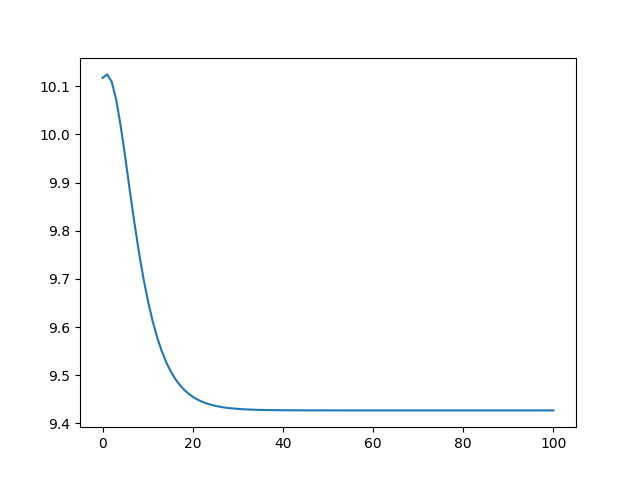

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
# Define time step
dt = 0.1

# Define the initial position, velocity, and acceleration
x0 = 10.
v0 = 0
a = 10

# Define the state transition matrix
A = np.array([[1, dt], [0, 1]]) # Velocity stays constant here while position updates according to velocity

# Define the control variable matrix
B = np.array([[0.5*dt**2], [dt]]) # 

# Define the control input
u = np.array([[a]])

# Define the initial state matrix
x_estimated = np.array([[x0], [v0]])

# Define the measurement matrix
H = np.array([[1, 0], [0, 1]])

# Define the measurement noise
R = np.array([[0.1, 0], [0, 0.1]])

# Define the process noise
Q = np.array([[0.01, 0.01], [0.01, 0.02]])

# Define the measurement
measurement = np.array([[x0 + np.random.normal(0, 0.55)], [v0 + np.random.normal(0, 0.55)]])

# Define the estimated covariance
P_estimated = np.eye(2)

x_list = []

for i in range(100):
    # Prediction step
    x_predicted = np.dot(A, x_estimated) + np.dot(B, u)
    P_predicted = np.dot(A, np.dot(P_estimated, A.T)) + Q

    # Correction step
    K = np.dot(P_predicted, np.dot(H.T, np.linalg.inv(np.dot(H, np.dot(P_predicted, H.T)) + R)))
    x_estimated = x_predicted + np.dot(K, (measurement - np.dot(H, x_predicted)))
    P_estimated = np.dot((np.eye(2) - np.dot(K, H)), P_predicted)
    x_list.append(x_estimated[0][0])
    # Print the estimated position and velocity
    print("Estimated x_position: ", x_estimated[0][0])
    print("Estimated velocity: ", x_estimated[1][0])
    
    
ax = plt.axes()
x = np.linspace(0,100,100)
ax.plot(x,x_list)
print(x_list)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

level_data_x = np.linspace(0,10,10)

level_data_y = np.linspace(0,10,10)
level_data_y += np.random.normal(1, 2)
axes2 = plt.axes()

axes2.plot(level_data_x, level_data_y)
plt.show()

# ITS PER MEASUREMENT

def run(ys):
    burnin = 50
    kf = KalmanFilter(dim_x=1, dim_z=1)
    kf.F = np.array([[1.]])
    kf.H = np.array([[1.]])

    # "Fit" the filter ... library does not seem to provide this functionality
    q_var = np.var(ys[:burnin])
    kf.Q = np.array([[q_var]])
    kf.R = np.array([[q_var]])

    x_rest = list()
    kf.x = np.array([0])
    kf.P *= 10.
    ys_test = ys[burnin:]
    for y in ys_test[:-1]:
        kf.predict()            # Predict does not return a value. Grumble grumble
        x_rest.append(kf.x[0])
        kf.update([y])

    return [0] + list(ys[:burnin]) + x_rest
XS = run(YS)
len(XS)

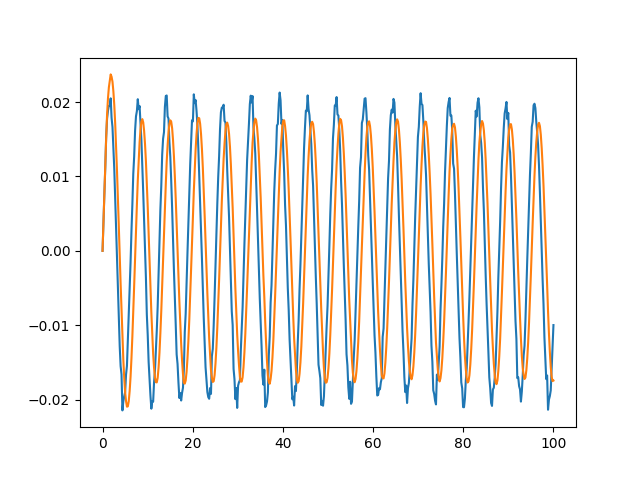

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

from filterpy.common import Q_discrete_white_noise
from filterpy.kalman import KalmanFilter



level_data_x = np.linspace(0,100,500)
#level_data_y = np.linspace(0,100,100)
level_data_y = np.sin(level_data_x)
level_data_y[:] *= np.random.normal(0.02,0.001,500)
axes2 = plt.axes()

# ITS PER MEASUREMENT

kalman_list = []


f = KalmanFilter (dim_x=2, dim_z=1)


f.F = np.array([[1.,1.],
                [0.,1.]])

f.H = np.array([[1.,0.]])

f.P = np.array([[1000.,    0.],
                [   0., 1000.] ])

f.R = np.array([[5.]])

f.Q = Q_discrete_white_noise(dim=2, dt=0.1, var=0.13)
    
for z in level_data_y:
    f.predict()
    f.update(z)
    kalman_list.append(f.x[0,0])

axes2.plot(level_data_x, level_data_y)
axes2.plot(level_data_x, kalman_list)
plt.show()
#do_something_with_estimate (f.x)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise

%matplotlib widget

level_data_x = np.linspace(0, 100, 100)
level_data_y = np.linspace(0, 100, 100)
level_data_y[:] *= np.random.normal(0.02, 0.001, 100)

# Create Kalman filter
f = KalmanFilter(dim_x=2, dim_z=1)

f.F = np.array([[1., 1.],
                [0., 1.]])
f.H = np.array([[1., 0.]])
f.P = np.array([[1000., 0.],
                [0., 1000.]])
f.R = np.array([[5.]])
#f.Q = Q_discrete_white_noise(dim=2, dt=0.1, var=0.01)

kalman_list = []

for z in level_data_y:
    f.predict()
    f.update(z)
    kalman_list.append(f.x[0, 0])  # Append the position estimate

# Plotting
plt.figure()
plt.plot(level_data_x, level_data_y, label='Measurements')
plt.plot(level_data_x, kalman_list, label='Kalman Filter Estimate')
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'book_plots'